In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [21]:
y = torch.zeros(n,2)
y[:,1].uniform_(-1.,1) # _ after "replaces" the number on index(1)
y[:5]

tensor([[ 0.0000, -0.9478],
        [ 0.0000,  0.0643],
        [ 0.0000,  0.5866],
        [ 0.0000,  0.3244],
        [ 0.0000,  0.1999]])

In [22]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.6696,  1.0000],
        [-0.0540,  1.0000],
        [ 0.4355,  1.0000],
        [-0.5893,  1.0000],
        [ 0.8657,  1.0000]])

In [23]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n) # @ can be a vector vector product, a matrix vector product, a vector matrix product, or a matrix matrix product

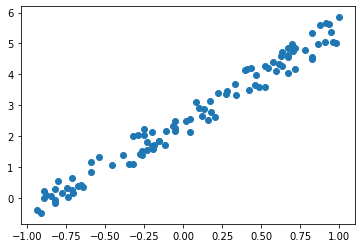

In [25]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [28]:
y_hat = x@a
mse(y_hat, y)

tensor(8.4358)

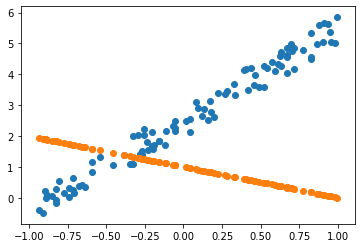

In [29]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [30]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a # our prediction
    loss = mse(y, y_hat) # mean squared error
    if t % 10 == 0: print(loss)
    loss.backward() # calculate gradient
    with torch.no_grad():
        a.sub_(lr * a.grad) # update coefficients, subtract to do opposite of what makes loss goes up
        a.grad.zero_()

In [32]:
lr = 1e-1 # learning rate
for t in range(100): update()

tensor(8.4358, grad_fn=<MeanBackward0>)
tensor(1.3628, grad_fn=<MeanBackward0>)
tensor(0.3942, grad_fn=<MeanBackward0>)
tensor(0.1590, grad_fn=<MeanBackward0>)
tensor(0.0998, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0811, grad_fn=<MeanBackward0>)
tensor(0.0802, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)


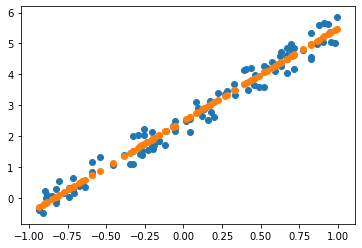

In [33]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [35]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- **Learning rate**: A thing we multiply our gradient by to decide how much to update the weights by.
- **Epoch**: One complete run through all of our data points (e.g. all of our images). So for non-stochastic gradient descent we just did, every single loop, we did the entire dataset. But if you've got a dataset with a thousand images and our mini-batch size is 100, then it would take you 10 iterations to see every image once. So that would be one epoch. Epochs are important because if you do lots of epochs, then you are looking at your images lots of times, so every time you see an image, there's a bigger chance of overfitting. So we generally don't want to do too many epochs.
- **Minibatch**: A random bunch of points that you use to update your weights.
- **SGD**: Stochastic gradient descent using mini-batches.
- **Model / Architecture**: They kind of mean the same thing. In this case, our architecture is $\vec{y} = X\vec{a}$﹣ the architecture is the mathematical function that you're fitting the parameters to. And we're going to learn later today or next week what the mathematical function of things like ResNet34 actually is. But it's basically pretty much what you've just seen. It's a bunch of matrix products.
- **Parameters/ Coefficients / Weights**: Numbers that you are updating.
- **Loss function**: The thing that's telling you how far away or how close you are to the correct answer. For classification problems, we use cross entropy loss, also known as negative log likelihood loss. This penalizes incorrect confident predictions, and correct unconfident predictions.

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.